# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://drive.google.com/file/d/14PJ4MluX7VR2tGmY4MCZ30mg-4IXaZyk/view?usp=sharing

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


I split the data manually since the images from the same person should only exist in one of the training, validation and test set. I split the data according to 70% training, 15% validation and 15% test. But since each person has 3(some have 2) images, we cannot split them exactly as 70%,15%,15%. We have to make sure the same person's images exist only in one of the dataset to avoid our model "remembering" the data. We cannot split data randomly because our model will have overly optimistic result. When we start to assess it on the real world data, it will perform poorly.

percentage of training data is : 69.3130399012752%, 1685 images.
percentage of validation data is : 15.261209378856439%, 371 images.
percentage of test data is : 15.425750719868367%, 375 images.


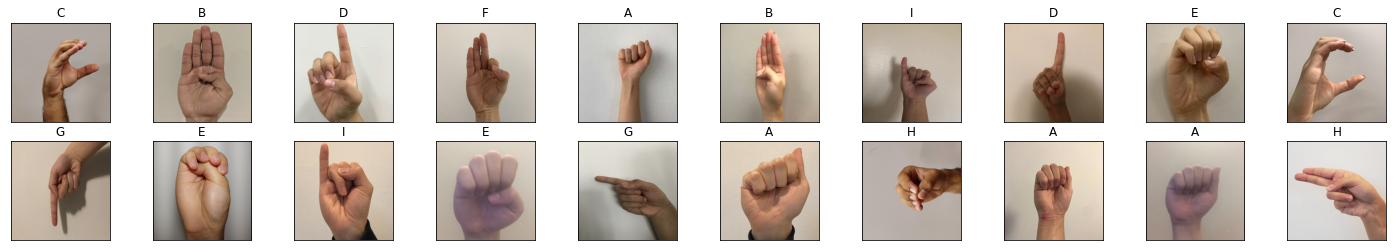

In [ ]:
# Some of the image are not 224*224, need to resize.
transform = transforms.Compose([transforms.Resize((224,224)), \
                      transforms.ToTensor()])

train_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/train'
validation_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/validation'
test_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/test'
train_set = torchvision.datasets.ImageFolder(train_folder, transform=transform)
val_set = torchvision.datasets.ImageFolder(validation_folder, transform=transform)
test_set = torchvision.datasets.ImageFolder(test_folder, transform=transform)
use_cuda = True

# Prepare Dataloader
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,num_workers=num_workers, shuffle=True)

# obtain one batch of training images
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])


total_size = len(train_set) + len(val_set) + len(test_set)
print(f"percentage of training data is : {(len(train_set)/ total_size) * 100}%, {len(train_set)} images.")
print(f"percentage of validation data is : {(len(val_set)/ total_size) * 100}%, {len(val_set)} images.")
print(f"percentage of test data is : {(len(test_set)/ total_size) * 100}%, {len(test_set)} images.")

### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

Since we are dealing with image data, we are using cnn architecture here. 
The input images are colored images which has 3 color channels. 
The network has 3 convolutional layers, each followed by a relu activation function and a maxpooling layer. Then it has 2 fully connected layers, with a relu activation function applied after the first fully connected layer. So in total, we have 5 trainable layers(3 conv layers and 2 fully connected layers).
The first convolutional layer has the following parameters: in_channels=3, out_channels=5, and kernal_size=5;. The max pooling layer has a kernal_size=2 and stride =2.The second convolutional layer has the following parameters: in_channels=5, out_channels=10 and kernal_size=5. The third convolutional layer has the following parameters: in_channels=10, out_channels=25 and kernal_size=5.<br>
The first fully connected layer has an input size = 25(number of feature maps) * 24 * 24 as calculated below and an output size of 32. We want the input from the convolutional layer to be 
flattened before passing to the fully connected layer(using .view). The second fully-connected layer has an input dimension of 32 which is aligned with the output dimension of the previous layer. Then it output 9 float numbers which corresponding to 9 classes. These numbers need to pass the softmax function to become probabilities. We do not have softmax in the network structure because pytoch cross entropy loss has softmax built-in.

using the formula learned in class, we can get the dimension of the input after 2 consecutive convolutional and pooling layers as follows: (224-5)/1+1=220,<br> (220-2)/2+1=110,<br> (110-5)/1+1=106,<br> (106-2)/2+1=53, <br> (53-5)/1+1=49,<br>(49-2)/2+1=24,<br>
So we have 25 24*24 feature maps after 3 consecutive convolutional and pooling layers.

In [ ]:
# Utilize the cnn structure from lab1. Add one more convolution and maxpool.
# Avoid complicated structure.
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.name = "cnn"        
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 5, kernel_size = 5)
        # we can reuse maxpool layer
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.conv3 = nn.Conv2d(10, 25, 5)
        self.fc1 = nn.Linear(25 * 24 * 24, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        # activation func: F.relu()
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 25 * 24 * 24)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #no softmax applied here since cross entropy loss in pytorch has built-in softmax.
        return x

### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def get_accuracy(model, data_loader,use_cuda=True):
    correct = 0
    total = 0
    for imgs, labels in data_loader:       
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,batch_size,learning_rate,epoch)
    return path

In [ ]:
def train(model, train_set,val_set , batch_size=64, lr=0.01,num_epochs=30):
    torch.manual_seed = 100
    criterion = nn.CrossEntropyLoss()# need this for built-in softmax
    optimizer = optim.Adam(model.parameters(), lr=lr)
    #optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    for epoch in range(num_epochs):
        #total_train_loss = 0.0
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################          
            out = model(imgs)             # forward pass
            #print(out)
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            #total_train_loss += loss.item()
        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy 
        print(("Epoch {}: Training accuracy: {} |" + "Validation accuracy: {}").format(epoch+1, train_acc[-1], val_acc[-1]))           
        model_path = get_model_name(model.name, batch_size, lr, epoch)
        torch.save(model.state_dict(), model_path)


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
# Since we only care about training accuracy. We can modify the above train method so that it only output training results

In [ ]:
def train2(model, batch_size=27, lr=0.001,num_epochs=200):
    torch.manual_seed(200)
    criterion = nn.CrossEntropyLoss()# need this for built-in softmax
    #optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    data_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/my_gesture'
    train_set = torchvision.datasets.ImageFolder(data_folder, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,num_workers=num_workers, shuffle=True)    
    iters, losses, train_acc = [], [], []

    # training
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################        
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy           
        #model_path = get_model_name(model.name, batch_size, lr, epoch)
        #torch.save(model.state_dict(), model_path)
        print("Epoch: {}, Training accuracy: {}".format(epoch+1, train_acc[-1]))
        if train_acc[-1] == 1: #if overfits to 100% accuracy, stop further training
          break

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.xlabel("epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))

CUDA is not available.  Training on CPU ...
Epoch: 1, Training accuracy: 0.1111111111111111
Epoch: 2, Training accuracy: 0.1111111111111111
Epoch: 3, Training accuracy: 0.25925925925925924
Epoch: 4, Training accuracy: 0.4074074074074074
Epoch: 5, Training accuracy: 0.2962962962962963
Epoch: 6, Training accuracy: 0.18518518518518517
Epoch: 7, Training accuracy: 0.3333333333333333
Epoch: 8, Training accuracy: 0.37037037037037035
Epoch: 9, Training accuracy: 0.37037037037037035
Epoch: 10, Training accuracy: 0.37037037037037035
Epoch: 11, Training accuracy: 0.48148148148148145
Epoch: 12, Training accuracy: 0.5555555555555556
Epoch: 13, Training accuracy: 0.5555555555555556
Epoch: 14, Training accuracy: 0.48148148148148145
Epoch: 15, Training accuracy: 0.6296296296296297
Epoch: 16, Training accuracy: 0.6296296296296297
Epoch: 17, Training accuracy: 0.7777777777777778
Epoch: 18, Training accuracy: 0.7037037037037037
Epoch: 19, Training accuracy: 0.7407407407407407
Epoch: 20, Training accurac

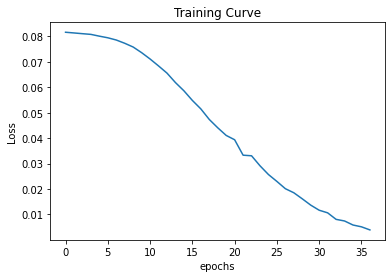

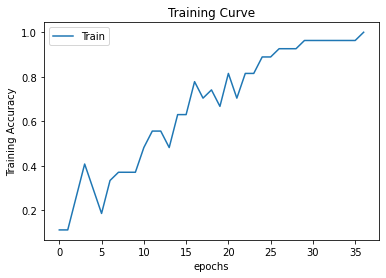

Final Training Accuracy: 1.0


In [ ]:
# default parameters are enough.
# we have 27 images in total. So batch size=27.
model = CNN_model()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train2(model)

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

In [ ]:
#code to load model
#model_path = get_model_name(model.name, batch_size=64, learning_rate=0.001, epoch=28)
#state = torch.load(model_path)
#model.load_state_dict(state)

Hyperparameters that worth tuning are learning rate, batch size and the kernel size in cnn.

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.4379821958456973 |Validation accuracy: 0.42587601078167114
Epoch 2: Training accuracy: 0.5317507418397626 |Validation accuracy: 0.5013477088948787
Epoch 3: Training accuracy: 0.6694362017804154 |Validation accuracy: 0.6522911051212938
Epoch 4: Training accuracy: 0.6943620178041543 |Validation accuracy: 0.6415094339622641
Epoch 5: Training accuracy: 0.7222551928783383 |Validation accuracy: 0.660377358490566
Epoch 6: Training accuracy: 0.7477744807121661 |Validation accuracy: 0.6873315363881402
Epoch 7: Training accuracy: 0.7673590504451039 |Validation accuracy: 0.6900269541778976
Epoch 8: Training accuracy: 0.7572700296735905 |Validation accuracy: 0.6442048517520216
Epoch 9: Training accuracy: 0.7869436201780415 |Validation accuracy: 0.706199460916442
Epoch 10: Training accuracy: 0.798219584569733 |Validation accuracy: 0.706199460916442


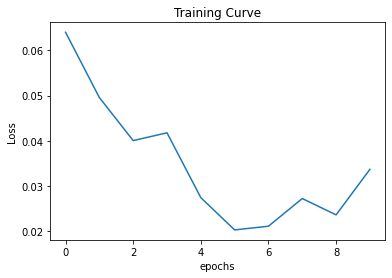

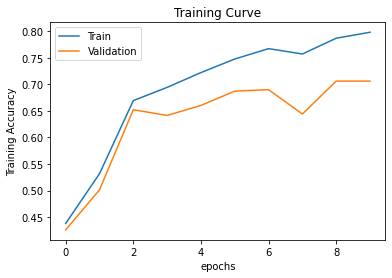

Final Training Accuracy: 0.798219584569733
Final Validation Accuracy: 0.706199460916442


In [ ]:
model = CNN_model()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train(model,train_set,val_set,batch_size=32,lr=0.001,num_epochs=10)

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.24629080118694363 |Validation accuracy: 0.24528301886792453
Epoch 2: Training accuracy: 0.1916913946587537 |Validation accuracy: 0.1347708894878706
Epoch 3: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132
Epoch 4: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132
Epoch 5: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132
Epoch 6: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132
Epoch 7: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132
Epoch 8: Training accuracy: 0.11157270029673591 |Validation accuracy: 0.11320754716981132
Epoch 9: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132
Epoch 10: Training accuracy: 0.11216617210682493 |Validation accuracy: 0.11320754716981132


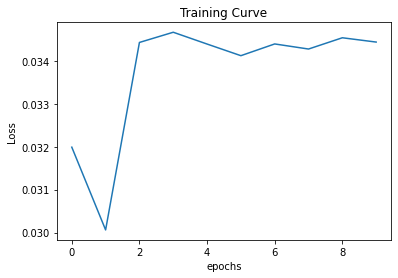

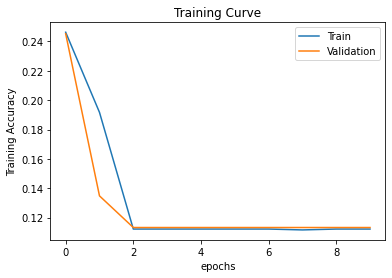

Final Training Accuracy: 0.11216617210682493
Final Validation Accuracy: 0.11320754716981132


In [ ]:
model = CNN_model()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train(model,train_set,val_set,batch_size=64,lr=0.005,num_epochs=10)

In [ ]:
# change the filter size of the last conv layer from 5 to 3.
class CNN_model2(nn.Module):
    def __init__(self):
        super(CNN_model2, self).__init__()
        self.name = "cnn2"        
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 5, kernel_size = 5)
        # we can reuse maxpool layer
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        # change the kernel/filter size from 5 to 3
        self.conv3 = nn.Conv2d(10, 25, 3)
        self.fc1 = nn.Linear(25 * 25 * 25, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        # activation func: F.relu()
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 25 * 25 * 25)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #no softmax applied here since cross entropy loss in pytorch has built-in softmax.
        return x

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.2516320474777448 |Validation accuracy: 0.2210242587601078
Epoch 2: Training accuracy: 0.44747774480712166 |Validation accuracy: 0.4582210242587601
Epoch 3: Training accuracy: 0.5388724035608309 |Validation accuracy: 0.49865229110512127
Epoch 4: Training accuracy: 0.6510385756676558 |Validation accuracy: 0.5714285714285714
Epoch 5: Training accuracy: 0.7056379821958457 |Validation accuracy: 0.6576819407008087
Epoch 6: Training accuracy: 0.7335311572700297 |Validation accuracy: 0.6792452830188679
Epoch 7: Training accuracy: 0.7649851632047477 |Validation accuracy: 0.6576819407008087
Epoch 8: Training accuracy: 0.7928783382789317 |Validation accuracy: 0.6738544474393531
Epoch 9: Training accuracy: 0.7922848664688428 |Validation accuracy: 0.6576819407008087
Epoch 10: Training accuracy: 0.8528189910979228 |Validation accuracy: 0.7088948787061995


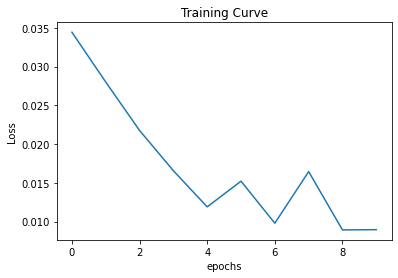

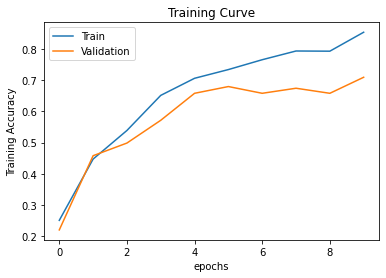

Final Training Accuracy: 0.8528189910979228
Final Validation Accuracy: 0.7088948787061995


In [ ]:
# let's try the default value for the new structure
model = CNN_model2()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train(model,train_set,val_set,batch_size=64,lr=0.001,num_epochs=10)

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.20178041543026706 |Validation accuracy: 0.20485175202156333
Epoch 2: Training accuracy: 0.3264094955489614 |Validation accuracy: 0.3423180592991914
Epoch 3: Training accuracy: 0.5922848664688427 |Validation accuracy: 0.5471698113207547
Epoch 4: Training accuracy: 0.6183976261127596 |Validation accuracy: 0.5876010781671159
Epoch 5: Training accuracy: 0.7008902077151336 |Validation accuracy: 0.6415094339622641
Epoch 6: Training accuracy: 0.7008902077151336 |Validation accuracy: 0.6199460916442049
Epoch 7: Training accuracy: 0.7127596439169139 |Validation accuracy: 0.6549865229110512
Epoch 8: Training accuracy: 0.744807121661721 |Validation accuracy: 0.6522911051212938
Epoch 9: Training accuracy: 0.7459940652818992 |Validation accuracy: 0.6657681940700808
Epoch 10: Training accuracy: 0.7750741839762612 |Validation accuracy: 0.6738544474393531


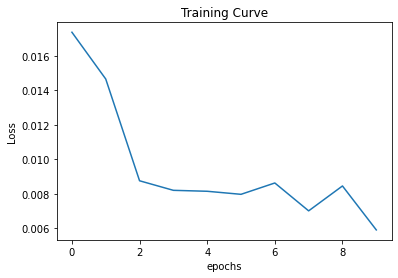

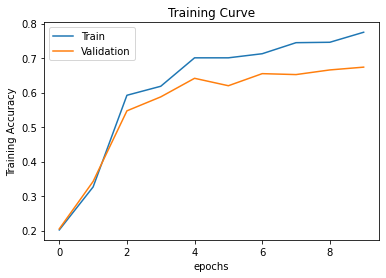

Final Training Accuracy: 0.7750741839762612
Final Validation Accuracy: 0.6738544474393531


In [ ]:
# increase the batch size to 128 for model2 above
model = CNN_model2()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train(model,train_set,val_set,batch_size=128,lr=0.001,num_epochs=10)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

It seems that the 3rd model defined above with default hyperparameters for learning rate and batch size give the best accuracy. We will use the model for testing. The best performance is at epoch 10. Since the saved model parameters are recorded from epoch 0-9, we will load the parameters from model_cnn2_bs64_lr0.001_epoch9

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
# load saved best model so far
model = CNN_model2()
#if use_cuda and torch.cuda.is_available():
  #model.cuda()
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.001, epoch=9)
state = torch.load(model_path)
model.load_state_dict(state)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64,shuffle=True)

In [ ]:
print(f"Test accuracy is {get_accuracy(model,test_loader)}.")

Test accuracy is 0.7386666666666667.


### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import os

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
torch.manual_seed(1) # set the random seed
# we want to process images one by one and put them in the correct class directory
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1,num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1,num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1,num_workers=num_workers, shuffle=True)
train_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/train_tensors'
validation_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/val_tensors'
test_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/test_tensors'



In [ ]:
def save_features(path, loader):
  n = 0
  for img, label in loader:
    features = alexnet.features(img)
    tensor = torch.from_numpy(features.detach().numpy())   
    #print(type(classes[label]))
    #create folder of each class(A-I) if not exist.
    dir = path + '/' + classes[label]
    if not os.path.exists(dir):
      os.mkdir(dir)
    # save each tensor as a .t file. So later we can load them. 
    torch.save(tensor.squeeze(0), dir + '/' + classes[label] + str(n) + '.t')
    n += 1
    #break
save_features(train_folder, train_loader)
save_features(validation_folder, val_loader)
save_features(test_folder, test_loader)

In [ ]:
type(classes[1])

str

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
#output = model(features)
#prob = F.softmax(output)

I choose to use 2 convolutional layers plus 2 fully connected layers. I didn't use any pooling layer because the dimension of data after passing through Alexnet is 256 * 6 * 6, which is small. If I use pooling layers, the dimension of feature maps will be very close to 2 or even 1. It will make it hard for model to learn. I believe the features coming out of Alexnet are enough to make impressive predictions because Alexnet itself already has 5 convolutional layers and 3 maxpooling layers. 

The number of input channel is 256. The network has 2 convolutional layers. We have 4 trainable layers(2 conv layers and 2 fully connected layers). The first convolutional layer has the following parameters: in_channels=256, out_channels=32, and kernal_size=2.The second convolutional layer has the following parameters: in_channels=32, out_channels=8 and kernal_size=2.


using the formula learned in class, we can get the dimension of the input after 2 consecutive convolutional and pooling layers as follows: <br>
(6-2)/1+1=5,<br>
(5-2)/1+1=4,<br>
So we have 8 4*4 feature maps after 2 consecutive convolutional layers.

In [ ]:
class transfer_model(nn.Module):
    def __init__(self):
        super(transfer_model, self).__init__()
        self.name = "transfer" 
        #tensors pass through alexnet has dimension 256*6*6       
        self.conv1 = nn.Conv2d(in_channels = 256, out_channels = 32, kernel_size = 2)
        # we can reuse maxpool layer
        #self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(32, 8, 2)
        self.fc1 = nn.Linear(8 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        # activation func: F.relu()
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 8 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #no softmax applied here since cross entropy loss in pytorch has built-in softmax.
        return x

In [ ]:
# Using only linear layers is sufficient for this task

In [ ]:
#load tensors instead of images this time
train_tensor = torchvision.datasets.DatasetFolder(train_folder, loader=torch.load, extensions=('.t'))
val_tensor = torchvision.datasets.DatasetFolder(validation_folder, loader=torch.load, extensions=('.t'))
test_tensor = torchvision.datasets.DatasetFolder(test_folder, loader=torch.load, extensions=('.t'))

In [ ]:
def transfer_train(model, train_set,val_set , batch_size=64, lr=0.01,num_epochs=30):
    torch.manual_seed = 100
    criterion = nn.CrossEntropyLoss()# need this for built-in softmax
    optimizer = optim.Adam(model.parameters(), lr=lr)
    #optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    for epoch in range(num_epochs):
        #total_train_loss = 0.0
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################          
            out = model(imgs)             # forward pass
            #print(out)
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            #total_train_loss += loss.item()
        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy 
        print(("Epoch {}: Training accuracy: {} |" + "Validation accuracy: {}").format(epoch+1, train_acc[-1], val_acc[-1]))           
        model_path = get_model_name(model.name, batch_size, lr, epoch)
        torch.save(model.state_dict(), model_path)


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
#tensor = torch.from_numpy(tensor.detach().numpy())

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.5070603337612324 |Validation accuracy: 0.4716981132075472
Epoch 2: Training accuracy: 0.7926829268292683 |Validation accuracy: 0.7520215633423181
Epoch 3: Training accuracy: 0.806803594351733 |Validation accuracy: 0.7115902964959568
Epoch 4: Training accuracy: 0.8498074454428755 |Validation accuracy: 0.7762803234501348
Epoch 5: Training accuracy: 0.8812580231065469 |Validation accuracy: 0.8490566037735849
Epoch 6: Training accuracy: 0.9159178433889602 |Validation accuracy: 0.8490566037735849
Epoch 7: Training accuracy: 0.9146341463414634 |Validation accuracy: 0.8490566037735849
Epoch 8: Training accuracy: 0.9390243902439024 |Validation accuracy: 0.8787061994609164
Epoch 9: Training accuracy: 0.9492939666238768 |Validation accuracy: 0.876010781671159
Epoch 10: Training accuracy: 0.9563543003851092 |Validation accuracy: 0.8706199460916442


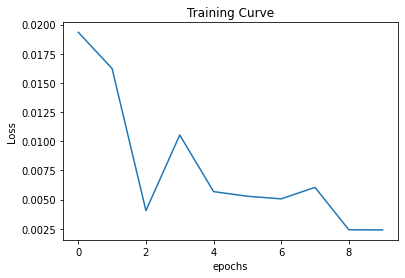

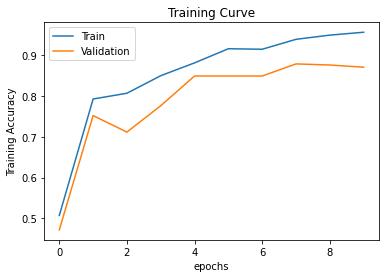

Final Training Accuracy: 0.9563543003851092
Final Validation Accuracy: 0.8706199460916442


In [ ]:
model = transfer_model()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
transfer_train(model,train_tensor,val_tensor,batch_size=64,lr=0.001,num_epochs=10)

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.733632862644416 |Validation accuracy: 0.7169811320754716
Epoch 2: Training accuracy: 0.8337612323491655 |Validation accuracy: 0.7816711590296496
Epoch 3: Training accuracy: 0.8722721437740694 |Validation accuracy: 0.8463611859838275
Epoch 4: Training accuracy: 0.9133504492939666 |Validation accuracy: 0.8274932614555256
Epoch 5: Training accuracy: 0.9332477535301669 |Validation accuracy: 0.862533692722372
Epoch 6: Training accuracy: 0.9518613607188704 |Validation accuracy: 0.8867924528301887
Epoch 7: Training accuracy: 0.9422336328626444 |Validation accuracy: 0.8194070080862533
Epoch 8: Training accuracy: 0.9711168164313222 |Validation accuracy: 0.8814016172506739
Epoch 9: Training accuracy: 0.9839537869062901 |Validation accuracy: 0.9002695417789758
Epoch 10: Training accuracy: 0.9839537869062901 |Validation accuracy: 0.894878706199461


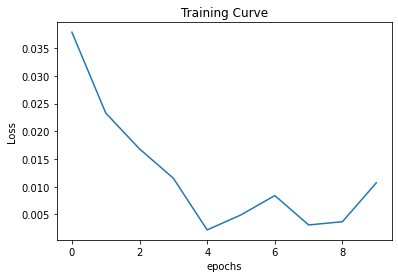

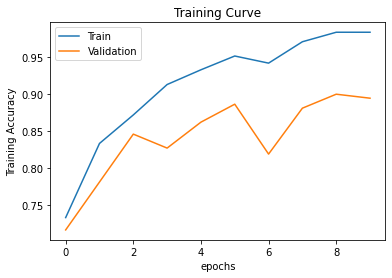

Final Training Accuracy: 0.9839537869062901
Final Validation Accuracy: 0.894878706199461


In [ ]:
model = transfer_model()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
transfer_train(model,train_tensor,val_tensor,batch_size=32,lr=0.001,num_epochs=10)

CUDA is not available.  Training on CPU ...
Epoch 1: Training accuracy: 0.6065468549422336 |Validation accuracy: 0.5471698113207547
Epoch 2: Training accuracy: 0.834403080872914 |Validation accuracy: 0.8274932614555256
Epoch 3: Training accuracy: 0.9011553273427471 |Validation accuracy: 0.8733153638814016
Epoch 4: Training accuracy: 0.9274711168164314 |Validation accuracy: 0.8840970350404312
Epoch 5: Training accuracy: 0.9274711168164314 |Validation accuracy: 0.8706199460916442
Epoch 6: Training accuracy: 0.962772785622593 |Validation accuracy: 0.9002695417789758
Epoch 7: Training accuracy: 0.9672657252888318 |Validation accuracy: 0.8867924528301887
Epoch 8: Training accuracy: 0.9775353016688062 |Validation accuracy: 0.9002695417789758
Epoch 9: Training accuracy: 0.9839537869062901 |Validation accuracy: 0.876010781671159
Epoch 10: Training accuracy: 0.9948652118100129 |Validation accuracy: 0.8921832884097035


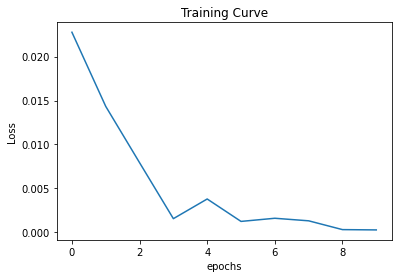

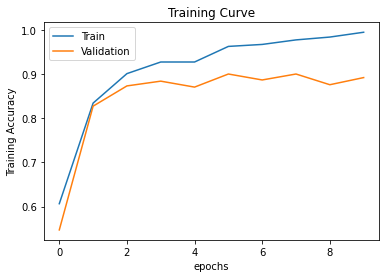

Final Training Accuracy: 0.9948652118100129
Final Validation Accuracy: 0.8921832884097035


In [ ]:
model = transfer_model()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
transfer_train(model,train_tensor,val_tensor,batch_size=64,lr=0.002,num_epochs=10)

The 3rd model with lr = 0.002 and batch size = 64 seems to be the best model. The learning curves are also very smooth.

We save the model after train it 8 epochs.(7 on the plot)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
test_loader = torch.utils.data.DataLoader(test_tensor, batch_size=64, shuffle=True)

In [ ]:
model = transfer_model()
# we need to load the model at epoch 8-1, since the starting index is 0.
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.002, epoch=7)
state = torch.load(model_path)
model.load_state_dict(state)
#if use_cuda and torch.cuda.is_available():
  #model.cuda()
accuracy = get_accuracy(model, test_loader)
print(f"The test accuracy is {accuracy}")

The test accuracy is 0.896


The test accuracy is higher than in Part 3(d)

### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [ ]:
data_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/my_gesture'
data_set = torchvision.datasets.ImageFolder(data_folder, transform=transform)
test_loader = torch.utils.data.DataLoader(data_set, batch_size=1,num_workers=0, shuffle=True)
test_folder =  '/content/gdrive/MyDrive/MIE1517/a2/dataset/my_gesture_tensors'

In [ ]:
save_features(test_folder, test_loader)

### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def get_accuracy2(model, data_loader,use_cuda=True):
    correct = 0
    total = 0
    targets = []
    predictions = []
    for data, labels in data_loader:       
        if use_cuda and torch.cuda.is_available():
          data = data.cuda()
          labels = labels.cuda()
        output = model(data)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        #print(labels.numpy()[0])
        targets.append(labels.numpy()[0])
        #print(pred.numpy()[0])
        predictions.append(pred.numpy()[0][0])
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += data.shape[0]
    return correct / total, predictions,targets

In [ ]:
test_tensor = torchvision.datasets.DatasetFolder(test_folder, loader=torch.load, extensions=('.t'))
test_loader = torch.utils.data.DataLoader(test_tensor, batch_size=1, shuffle=False)

In [ ]:
model = transfer_model()
# we need to load the model at epoch 8-1, since the starting index is 0.
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.002, epoch=7)
state = torch.load(model_path)
model.load_state_dict(state)
#if use_cuda and torch.cuda.is_available():
  #model.cuda()
accuracy,predictions,targets = get_accuracy2(model, test_loader)
print(f"The test accuracy is {accuracy}")

The test accuracy is 0.8148148148148148


The test accuracy is lower than in Part 4(d).

In [ ]:
cm = confusion_matrix(y_true=targets,y_pred=predictions)

In [ ]:
df_cm = pd.DataFrame(data=cm,columns=classes,index=classes)

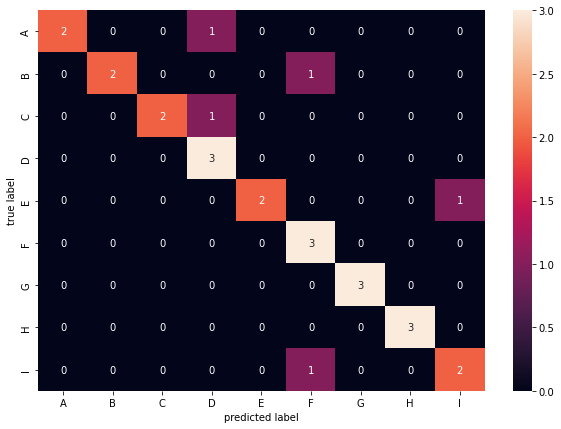

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,xticklabels=classes,yticklabels=classes,annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

It seems that our best model have 5 incorrect predictions out of 27 predictions. One for each class in [A,B,C,E,I]. The model confused A,C with D, B,I with F and E with I. If we take a look at the actual pictures, we can see that [A,C,D],[B,I,F],[E,I] are similar postures. It is acceptable for our model to have these minor mistakes. 

The most promising reason for the difference in the test accuracies is that our own dataset has only 27 sample images, which is significantly smaller than the test set we used in the previous part, which has 375 images. The accuracy is within acceptable range. If our own dataset has comparable amount of images(around 300), it is highly likely that the test accuracy will be very close to 89.6%(test accuracy in Part 4(d)).<br>
Other reasons may include whether the image data has been preprocessed or not. Some of the images might be cropped ,sharpened, rotated or normalized while other images are not. The brightness of images also differs largely. This can cause some problem for the model if the training and test set differs too much.

Besides the above reasons, I also found that some pictures in the dataset we are given are just classified wrong. For example, 3_E_1 to 3_E_3, 3_F_1 to 3_F_3, 3_G_1 to 3_G_3, 3_H_1 to 3_H_3 are misclassified. Our model uses these wrong labels for training. It can influence the learning process significatly if the training dataset is small. 

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus